Probabilities
=============

Bayes' Theorem
--------------

We are _Bayesian beings_. 

$$ I = \text{information} $$
$$ P = \text{probability} $$


## Rules of Probability

Given $A$,$\bar{A}$

$$ p(\bar{A}) = 1 - p(A) $$

$p(A) \equiv p(A|I)$ is a statement which can be written
> The probability of A is defined as the probability of A _conditioned on_ I

$p(A,B|I)$ is "the probability of A _and_ B _conditioned on_ I".


### Example

Imagine I have an entire universe, it is well studied. We are interested in the location of the red "x".
<img src="https://docs.google.com/drawings/d/1bNLT4S7tTxHLuh3W61fNyL1m9BYqQAnBs3muSIA-i_A/pub?w=1036&h=710" width=70%>

#### Question 1. 
What is the probability that the x is in b?

If x can be anywhere, then the probability that _x_ is in $B$ is given by the ratio of the area of $B$ to the area of the universe.
 - $p(\,B\,|\,I\,) = \frac{1}{12}$
 
 
#### Question 2.
Are $A$ and $B$ commutative?
$$ p(B,A|I)\stackrel{?}{=} p(A,B|I) $$

Yes!
$$ p(B,A|I)= p(A,B|I) $$

#### Assertion 1.
I am going to assert that $$ p(B,A|I) = p(B|I)p(A|B,I) $$

Is this true? Why?

The probability $p(A|B,I) = 1$ because $B \subset A$. If only a fraction $f$ of $B$ were in $A$, then $p(A|B,I)\rightarrow f$, so $p(B,A|I) = f \cdot p(B|I)$.

<img src="https://docs.google.com/drawings/d/1JVktrm4VhyybTlPLs13SCEgIpacjB0Tn3v9Bn1gnz4g/pub?w=1036&h=710" width=70%>

$ p(B|I) = \frac{2}{20} $

$ p(A|B,I) = f = \frac{1}{2}$

$p(B,A,|I) = \frac{1}{20} $

We can find that $p(A,B|I)=p(A|I)p(B|A,I)$.

Combining these two things together gives us Bayes' Theorem

$$ p(A|B,I) = \frac{p(A|I) p(B|A,I)}{p(B|I)} $$

Bayes' Theorem
==============


As physicsists, we have a hypothesis, $H$. Our hyposthesis is based on data, $D$, and information, $I$ that we have. These quantities are usually denoted as vectors. 

We might have a hypothesis that Saturn is a planet with some mass. We have data on Saturn and general information that it is a planet, it is made of hydrogen and helium. 


$$ p(\vec{H}|\vec{D},I) = \frac{ p(\vec{H}|I)\ p(\vec{D}|\vec{H},I) }{ p(\vec{D}|I) } $$

$p(\vec{D}|\vec{H},I)$ is the probability we would get this data given our hypothesis and information. This is doable. Figuring out $p(\vec{H}|\vec{D},I)$ is a more difficult question, that is what everyone is looking for.


Demonstration: Coin toss
-------------
If you assert a bad hypothesis ("this is a rigged coin that will only return heads") data can completely  refute that hypothesis (i.e, flip the coin and it turns _tails_, *_Boom_*, hypothesis refuted)


Because $p(\vec{D}|I)$ doesn't affect my hypothesis, I can rewrie Bayes' theorem as a proportionality

$$ p(\vec{H}|\vec{D},I) = C\ p(\vec{H}|I)\ p(\vec{D}|\vec{H},I)  $$

$p(\vec{H}|I)$ is your **prior** information, it is the probability my hypothesis is true given my information without any information. We allow our prior expectations to be modified by new data. This is the likelihood. 

$p(\vec{D}|\vec{H},I)$ is the **likelihood**. It describes how likely your data is given your hypothesis and informatoin.

An analogy for our prior information being updated by new information is kind of like leaving the Matrix. Before leaving the matrix based on your prior information (i.e.; your life), you believe that you live in the real world. Your likelihood updates when Morpheus tells you, and you believe him a little more, but then you get spit out after taking a pill. Now your probability collapses and you know your previous life was not the real world.


### Back to the coin toss
Bias, if the coin is biased towards $T$, $B=0$, and if biased towards $H$, $B=1$. Our hypothesis is
$$ \vec{H} = \{B\} $$

What is our _prior_? With enough data it almost doesn't matter what your prior is. It may be either a unit box, a gaussian, or something assymetric

A prior should be normailzed 
$$\int p(B|I) {\rm d}B = 1 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(u'default')
%matplotlib inline
plt.style.use(u'ggplot')
plt.style.use(u'seaborn-bright')

/Users/johnlewisiii/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Given a particular bias B, because we defined that $B=1$ for always heads, then
$$h \rightarrow B$$
$$t \rightarrow 1-B$$
because there are only two choices. 

D    |   $L = p({D}|{B},I)$
----:|:--------------------
h    |   B
t    |   (1-B)


$p(\{h,h\}|B) = B\cdot B$

$p(\{h,t\}|B) = B\cdot (1-B)$

$p(\{...\}|B) = B^k\cdot (1-B)^(n-k)$


The log-likelihood would be
$ \log(B^k (1-B)^{(n-k)}) = k \log{B} + (n-k)\log{(1-B)} $

In [2]:
def prior(b,b_range=(0,1)):
    '''
    Encode a flat prior
    We are not checking
    for errors, instead we
    assume humans are smart
    '''
    b = np.array([b]).flatten()
    p = np.zeros_like(b)
    p[np.abs(b)<=1] = 1
    p[b<0] = 0
    return p

def logprior(b):
    '''
    Encode a flat prior
    We are not checking
    for errors, instead we
    assume humans are smart
    '''
    return np.log(prior(b))

'''
def like_single_toss(d,b):
    if d == 0:
        return 1-b
    if d == 1:
        return b


def loglike(data,bias):
    data = np.array([data]).flatten()
    bias = np.array([bias]).flatten()
    L = np.sum([like_single_toss(d,bias) for d in data],axis=0)
    return L
'''

def loglike(data,b,k=None,n=None):
    '''
    the Log-likelihood of the data
    given our hypothesis
    d is data
    d = 0 for t
    d = 1 for h
    '''
    if data is not None:
        data = np.array([data]).flatten()
        k = np.sum(data)
        n = len(data)
    else:
        k = k
        n = n
    b = np.array([b]).flatten()
    
    return (np.log(b) * k) + np.log(1-b)*(n-k)


def posterior(data,b,k=None,n=None):
    if data is None:
        post = loglike(data,b,k=k,n=n)
    else:
        post = loglike(data,b)
    post = post + logprior(b)
    post = post - np.max(post) 
    return np.exp(post)

b = np.linspace(0.01,0.99,1000)

## Plot of the Prior

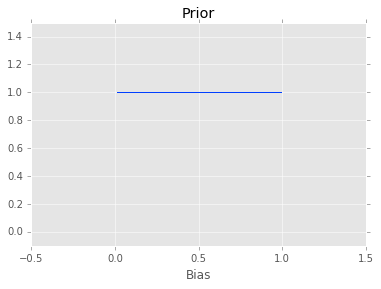

In [3]:
plt.plot(b,prior(b))
plt.title('Prior')
plt.xlabel('Bias')
plt.xlim(-0.5,1.5)
plt.ylim(-0.1,1.5);

## Plot of likelihoods

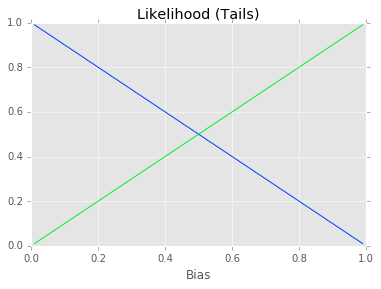

In [4]:
plt.plot(b,np.exp(loglike(0,b)))
plt.title('Likelihood (Heads)')
plt.xlabel('Bias')

plt.plot(b,np.exp(loglike(1.,b)))
plt.title('Likelihood (Tails)')
plt.xlabel('Bias')

### Virtual Coin Toss

We can run a virtual experiment. First let's plot the prior. Out prior information tells us that the coin has two sides, heads and tails, but we don't know if the coin is rigged. 

Our hypothesis in this experiment is our choice of the bias. So we want to find out, for a given set of data, what is the probability that the bias has a certain value. This probability is the _posterior distribution_ $$p(H|D,I)$$


We then look at the the likelihood of heads and tails. In other words, we look at how consistent the data is with our hyptohesis and prexisting information. If the bias is strongly towards heads, a "heads" data point is very likely, while a "tails" data point is quite unlikely. 


In [5]:

def some_tosses(data,b):
    plt.figure(figsize=(12,4))

    plt.subplot(121)
    plt.plot(b,np.exp(loglike(data,b)))
    plt.title('Likelihood (Heads)')
    plt.xlabel('Bias')


    plt.subplot(122)
    plt.plot(b,posterior(data,b))
    plt.title('Posterior Distrubution')
    plt.xlabel('Bias')
    plt.ylim(-0.01,1.1)
    
    return data,b,plt.gca()



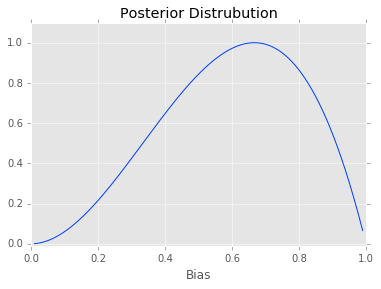

In [6]:
data = [1,0,1]  #single coin toss

fig, ax = plt.subplots()
line, =ax.plot(b,posterior(data,b))
ax.set_title('Posterior Distrubution')
ax.set_xlabel('Bias')
ax.set_ylim(-0.01,1.1);

### Make an animation

To see visually how adding data improves our posterior,
we can plot the posterior for different values of $k$ and $n$
assuming a constant bias. 

To figure this out, because I've never done this before I went through a tutorial by JakeVdP available at
> [Matplotlib Animation Tutorial](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

In [7]:
import matplotlib.animation as anime #import animation library
from IPython.display import HTML # have IPython display render HTML code

In [16]:
%%capture 
#hides uncessesary output. display.HTML still gets displayed

#define list of biases
b = np.linspace(0.01,0.99,10000)

# create an initial figure and axis
fig = plt.figure()
ax = plt.axes(xlim=(0,1), ylim=(0,1.1))
line, = ax.plot([],[]) 


def init():
    '''
    this function initialized the animation
    by clearing any data that may be on it
    and adding any permanent elements
    '''
    line.set_data(b,posterior(None,b,k=1,n=1)) # clear any plotted lines
    ax.vlines(1./3.,0,1) # add a vertical line at the right answer
    ax.set_title('Posterior Distribution (Bias = 1/3)')
    return line,

    
def animate(i):
    '''
    what we want to do for each step
    I want to overplot a new posterior
    for each new set of rolls
    '''
    if not (i == 1):
        #the number of rolls is i
        n = i 
        #I want the first roll to be heads. n/3 only returns the integer part
        y = posterior(None,b,k=1+n/3,n=n)
        #plot the data. to clear and draw new line do line.set_data(b,y)
        line.axes.plot(b,y)
        # add a legend incrementally. 
        line.axes.legend(['n=%4i'%j for j in [1,3,10,50,100] if j<=i],loc='upper left',fontsize=11)
        return line,
    else:
        return line,

anim = anime.FuncAnimation(fig, animate, init_func=init,
                               frames=[1,3,10,50,100], interval=1000, blit=False)

#anim.save('anim.mp4',dpi=300, fps=1, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
#HTML("<video width='75%' controls><source src='./anim.mp4' type='video/mp4'></video>")